In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Datasets/ushape.csv')

In [3]:
df.head()

,X1,X2,Y
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


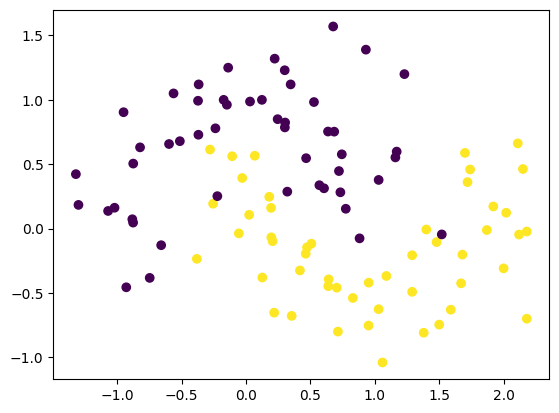

In [4]:
plt.scatter(x=df['X1'],y=df['X2'],c=df['Y'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [19]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(100,activation='relu',kernel_initializer='he_normal',))
model.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(100,activation='relu',kernel_initializer='he_normal', kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,701 (119.93 KB)

 Trainable params: 30,701 (119.93 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.4234 - loss: 2.9473 - val_accuracy: 0.7500 - val_loss: 2.4584
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7766 - loss: 2.4203 - val_accuracy: 0.8500 - val_loss: 2.2617
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8141 - loss: 2.3005 - val_accuracy: 0.8500 - val_loss: 2.1368
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7789 - loss: 2.2633 - val_accuracy: 0.9000 - val_loss: 2.0379
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8172 - loss: 2.1996 - val_accuracy: 0.9500 - val_loss: 1.9703
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8406 - loss: 2.1032 - val_accuracy: 0.9000 - val_loss: 1.9237
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8406 - loss: 2.0339 - val_accuracy: 0.9000 - val_loss: 1.8734
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8406 - loss: 1.9928 - val_accuracy: 0.9000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 982us/step


<Axes: >

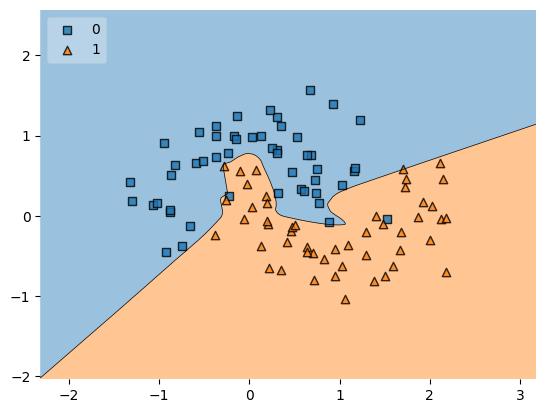

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)